# Import useful libs

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import geopandas as gpd

# Read Auxiliar CSVs

In [ ]:
anotate_codes = pd.read_csv('./datasets/anotate_codes.csv')
claim_codes = pd.read_csv('./datasets/claim_codes.csv')
commod_type_codes = pd.read_csv('./datasets/commod_type_codes.csv')
commodity_codes = pd.read_csv('./datasets/commodity_codes.csv')
concen_codes = pd.read_csv('./datasets/concen_codes.csv')
confmethod_codes = pd.read_csv('./datasets/confmethod_codes.csv')
country_codes = pd.read_csv('./datasets/country_codes.csv')
determin_codes = pd.read_csv('./datasets/determin_codes.csv')
diisttype_codes = pd.read_csv('./datasets/disttype_codes.csv')
extract_codes = pd.read_csv('./datasets/extract_codes.csv')
lab_codes = pd.read_csv('./datasets/lab_codes.csv')
mean_codes = pd.read_csv('./datasets/mean_codes.csv')
origin_codes = pd.read_csv('./datasets/origin_codes.csv')
pest_codes = pd.read_csv('./datasets/pest_codes.csv')
quantitate_codes = pd.read_csv('./datasets/quantitate_codes.csv')
state_codes = pd.read_csv('./datasets/state_codes.csv')
test_class_codes = pd.read_csv('./datasets/test_class_codes.csv')
tolerance_codes = pd.read_csv('./datasets/tolerance_codes.csv')
us_states = pd.read_csv('./datasets/us_states.csv')

# Read Samples from all years

In [ ]:
samples_colums_labels = ('sample_pk','state', 'year', 'month', 'day', 'site', 'commod', 'source_id', 'variety', 'origin', 'country', 'disttype', 'commtype', 'claim', 'quantity', 'growst', 'packst', 'diistst');

samples_15 = pd.read_csv('./datasets/database/2015PDPDatabase/PDP15Samples.txt', delimiter="|", names=samples_colums_labels);
samples_16 = pd.read_csv('./datasets/database/2016PDPDatabase/PDP16Samples.txt', delimiter="|", names=samples_colums_labels);
samples_17 = pd.read_csv('./datasets/database/2017PDPDatabase/PDP17Samples.txt', delimiter="|", names=samples_colums_labels);
samples_18 = pd.read_csv('./datasets/database/2018PDPDatabase/PDP18Samples.txt', delimiter="|", names=samples_colums_labels);
samples_19 = pd.read_csv('./datasets/database/2019PDPDatabase/PDP19Samples.txt', delimiter="|", names=samples_colums_labels);

# Remove imported products
samples_15 = samples_15[samples_15['origin']==1]
samples_16 = samples_16[samples_16['origin']==1]
samples_17 = samples_17[samples_17['origin']==1]
samples_18 = samples_18[samples_18['origin']==1]
samples_19 = samples_19[samples_19['origin']==1]

# Remove unnecessary columns
samples_15.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_16.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_17.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_18.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 
samples_19.drop(columns=['country', 'growst', 'packst', 'diistst'], inplace = True) 

# Read Results of all years

In [ ]:
results_colums_labels = ('sample_pk','commod', 'commtype', 'lab', 'pestcode', 'testclass', 'concen', 'lod', 'conunit', 'confmethod', 'confmethod2', 'annotate', 'quantitate', 'mean', 'extract', 'determin');
results_15 = pd.read_csv('./datasets/database/2015PDPDatabase/PDP15Results.txt', delimiter="|", names=results_colums_labels);
results_16 = pd.read_csv('./datasets/database/2016PDPDatabase/PDP16Results.txt', delimiter="|", names=results_colums_labels);
results_17 = pd.read_csv('./datasets/database/2017PDPDatabase/PDP17Results.txt', delimiter="|", names=results_colums_labels);
results_18 = pd.read_csv('./datasets/database/2018PDPDatabase/PDP18Results.txt', delimiter="|", names=results_colums_labels);
results_19 = pd.read_csv('./datasets/database/2019PDPDatabase/PDP19Results.txt', delimiter="|", names=results_colums_labels);

# Join results and samples CSVs

In [ ]:
results_join_samples_15 = results_15.merge(samples_15,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_16 = results_16.merge(samples_16,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_17 = results_17.merge(samples_17,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_18 = results_18.merge(samples_18,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})
results_join_samples_19 = results_19.merge(samples_19,on='sample_pk',how='inner').drop(columns=['commod_y', 'commtype_y']).rename(columns={'commod_x': 'commod', 'commtype_x':'commtype'})

# Count each pesticide's presence in all years

In [146]:
def count_pest (df):
  index_name = 'count_' + str(df.loc[0]['year'])
  return df["pestcode"].value_counts().rename_axis(['pestcode']).reset_index(name=index_name)

In [153]:
pest_count_general_15 = count_pest(results_join_samples_15)
pest_count_general_16 = count_pest(results_join_samples_16)
pest_count_general_17 = count_pest(results_join_samples_17)
pest_count_general_18 = count_pest(results_join_samples_18)
pest_count_general_19 = count_pest(results_join_samples_19)

In [ ]:
count_general_all_years = pest_count_general_15.merge(pest_count_general_16, on='pestcode', how='inner').merge(pest_count_general_17, on='pestcode', how='inner').merge(pest_count_general_18, on='pestcode', how='inner').merge(pest_count_general_19, on='pestcode', how='inner')

only_values = count_general_all_years.loc[:,'count_15':]
only_values_T = only_values.T
only_values_T.columns=count_general_all_years['pestcode']

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

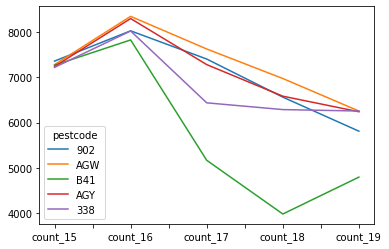

In [154]:
plt.figure()

# Select only a subset because there are too many pesticides
only_values_T.iloc[:,50:55].plot()

# Count each pesticide's presence per state in all years

In [135]:
def count_pest_state (df):
  pest_per_state = df[['pestcode', 'state']]
  pest_state_count = pest_per_state.value_counts().rename_axis(['pestcode', 'state']).reset_index(name='count')
  return pest_state_count.merge(us_states, on='state', how='inner')

In [139]:
pest_state_count_15 = count_pest_state(results_join_samples_15)
pest_state_count_16 = count_pest_state(results_join_samples_16)
pest_state_count_17 = count_pest_state(results_join_samples_17)
pest_state_count_18 = count_pest_state(results_join_samples_18)
pest_state_count_19 = count_pest_state(results_join_samples_19)

# Get only states and commodities with concentration values in all years

In [ ]:
def get_state_commod_concen_mean (df):
  pest_concen_not_null = df[~df['concen'].isna()]
  
  concen_state_commod_mean = pest_concen_not_null[['year','pestcode', 'state', 'commod', 'concen', 'lod']].groupby(['year', 'state', 'commod', 'pestcode', 'lod'])['concen'].mean().rename_axis(['year', 'state', 'commod', 'pestcode', 'lod']).reset_index(name='concen').sort_values('state')
  
  return concen_state_commod_mean.merge(us_states, on='state', how='inner')

def select_pest_commod (df, c, p):
    return df[(df['pestcode']==p) & (df['commod']==c)]
    
def colorize_concen (row):
  if row['concen']>row['lod']:
    return '#C62828'
  if row['concen']<=row['lod']:
    return '#283593'

def get_commod_state_concen_colors(df, c, p):
  df_result = select_pest_commod(df, c, p)
  colors_column = df_result.apply(lambda row: colorize_concen(row), axis=1)
  try:
    df_result['mapcolor'] = colors_column
  except:
    print('Um dos valores informados não existe na tabela do ano ' + str(df.loc[0]['year']))
  return df_result


In [ ]:
concen_state_commod_mean_15 = get_state_commod_concen_mean(results_join_samples_15)
concen_state_commod_mean_16 = get_state_commod_concen_mean(results_join_samples_16)
concen_state_commod_mean_17 = get_state_commod_concen_mean(results_join_samples_17)
concen_state_commod_mean_18 = get_state_commod_concen_mean(results_join_samples_18)
concen_state_commod_mean_19 = get_state_commod_concen_mean(results_join_samples_19)

In [ ]:
concen_state_commod_mean_17[(concen_state_commod_mean_17['concen']
<=concen_state_commod_mean_17['lod'])]

In [ ]:
commod_state_concen_colors_15 = get_commod_state_concen_colors(concen_state_commod_mean_15, 'AP', 'AKD')
commod_state_concen_colors_16 = get_commod_state_concen_colors(concen_state_commod_mean_16, 'SP', '781')
commod_state_concen_colors_17 = get_commod_state_concen_colors(concen_state_commod_mean_17, 'AP', 'AKD')
commod_state_concen_colors_18 = get_commod_state_concen_colors(concen_state_commod_mean_18, 'AP', 'AKD')
commod_state_concen_colors_19 = get_commod_state_concen_colors(concen_state_commod_mean_19, 'AS', 'AKD')

## Plot pesticide concentrarion per commodity per state

In [ ]:
gpd.GeoDataFrame(commod_state_concen_colors_16, geometry=gpd.points_from_xy(commod_state_concen_colors_16.longitude, commod_state_concen_colors_16.latitude))
states = gpd.read_file('shapes/usa-states-census-2014.shp')
states = states.to_crs("EPSG:3395")

In [ ]:
states_colors = commod_state_concen_colors_16[['state', 'mapcolor']]
teste2 = states.rename(columns={'STUSPS': 'state'}).merge(states_colors, on='state', how='left')
teste3 = teste2.fillna('#fffacf')

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
states.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5),axis=1);
states.plot(ax=ax, figsize=(12,12), color=teste3['mapcolor'])

# Count each pesticide's presence per commodity in all years

In [131]:
def count_pest_commod(df):
  return df[['pestcode','commod']].value_counts().rename_axis(['pestcode', 'commod']).reset_index(name='count')

In [132]:
pest_commod_count_15 = count_pest_commod(results_join_samples_15)
pest_commod_count_16 = count_pest_commod(results_join_samples_16)
pest_commod_count_17 = count_pest_commod(results_join_samples_17)
pest_commod_count_18 = count_pest_commod(results_join_samples_18)
pest_commod_count_19 = count_pest_commod(results_join_samples_19)